Number of NO2 samples: 77122
ar = 0.30000000000000004, br = 1.2

Learned PDF Parameters:
mu (μ)     = 22.9826
lambda (λ) = 0.001688
c          = 0.023180


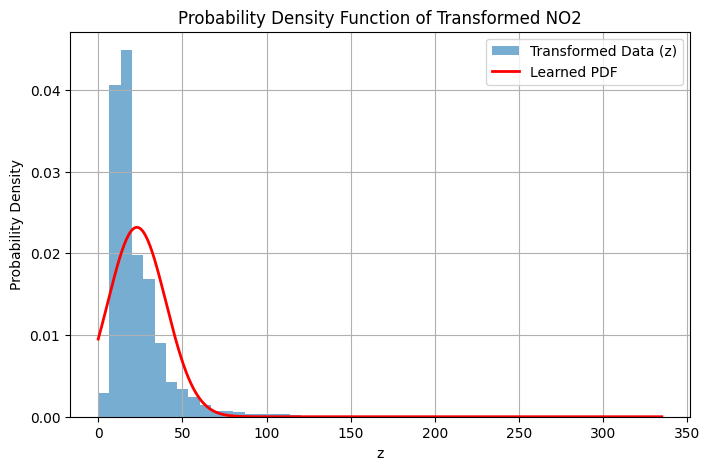

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("/content/data.csv")


x = data["no2"].dropna().astype(float).values

print("Number of NO2 samples:", len(x))


r = 102316073

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print(f"ar = {ar}, br = {br}")


z = x + ar * np.sin(br * x)


mu = np.mean(z)
sigma = np.std(z)

lambda_param = 1 / (2 * sigma**2)
c = np.sqrt(lambda_param / np.pi)

print("\nLearned PDF Parameters:")
print(f"mu (μ)     = {mu:.4f}")
print(f"lambda (λ) = {lambda_param:.6f}")
print(f"c          = {c:.6f}")


def learned_pdf(z):
    return c * np.exp(-lambda_param * (z - mu)**2)


z_range = np.linspace(z.min(), z.max(), 500)

plt.figure(figsize=(8, 5))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Transformed Data (z)")
plt.plot(z_range, learned_pdf(z_range), color="red", linewidth=2, label="Learned PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Transformed NO2")
plt.legend()
plt.grid(True)
plt.show()
